# Model Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import os
import acquire
import prepare

In [2]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1. 
- What is your baseline prediction?
- What is your baseline accuracy?
Remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [48]:
titanic.shape

(891, 13)

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [38]:
titanic.survived.mean()

0.3838383838383838

In [4]:
train, validate, test = prepare.prep_titanic_data(titanic)
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,0,3,28.000000,0,0,7.8958,1,1,0,1
636,0,3,32.000000,0,0,7.9250,1,1,0,1
222,0,3,51.000000,0,0,8.0500,1,1,0,1
485,0,3,29.678105,3,1,25.4667,0,0,0,1


In [5]:
validate

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
610,0,3,39.000000,1,5,31.2750,0,0,0,1
424,0,3,18.000000,1,1,20.2125,0,1,0,1
568,0,3,29.678105,0,0,7.2292,1,1,0,0
334,1,1,29.678105,1,0,133.6500,0,0,0,1
101,0,3,29.678105,0,0,7.8958,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
176,0,3,29.678105,3,1,25.4667,0,1,0,1
372,0,3,19.000000,0,0,8.0500,1,1,0,1
737,1,1,35.000000,0,0,512.3292,1,1,0,0
862,1,1,48.000000,0,0,25.9292,1,0,0,1


In [6]:
test

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
561,0,3,40.000000,0,0,7.8958,1,1,0,1
641,1,1,24.000000,0,0,69.3000,1,0,0,0
400,1,3,39.000000,0,0,7.9250,1,1,0,1
498,0,1,25.000000,1,2,151.5500,0,0,0,1
875,1,3,15.000000,0,0,7.2250,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
339,0,1,45.000000,0,0,35.5000,1,1,0,1
841,0,2,16.000000,0,0,10.5000,1,1,0,1
442,0,3,25.000000,1,0,7.7750,0,1,0,1
815,0,1,29.678105,0,0,0.0000,1,1,0,1


#### 1. My baseline prediction: Most passengers did not survive.

In [45]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [52]:
train['baseline_prediction'] = '0'
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
baseline_accuracy

0.0

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
# List of X_ and y_ for train, validate, and test

        # X_train = train.drop(columns=['survived'])
        # y_train = train.survived

        # X_validate = validate.drop(columns=['survived'])
        # y_validate = validate.survived

        # X_test = test.drop(columns=['survived'])
        # y_test = test.survived

In [7]:
# Creating the X & y version of train, where X is a DataFrame of all the features (columns)
# and y is a series with the target variable only (survived here).

X_train = train.drop(columns=['survived'])
y_train = train.survived
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [8]:
clf = clf.fit(X_train, y_train)

#### Decision tree visualization

In [21]:
clf.classes_

array([0, 1])

[Text(697.5, 951.3000000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = Did not survive'),
 Text(348.75, 679.5, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = Survived'),
 Text(174.375, 407.70000000000005, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = Survived'),
 Text(87.1875, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Did not survive'),
 Text(261.5625, 135.89999999999998, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = Survived'),
 Text(523.125, 407.70000000000005, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = Survived'),
 Text(435.9375, 135.89999999999998, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = Survived'),
 Text(610.3125, 135.89999999999998, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = Did not survive'),
 Text(1046.25, 679.5, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = Did not survive'),
 Text(

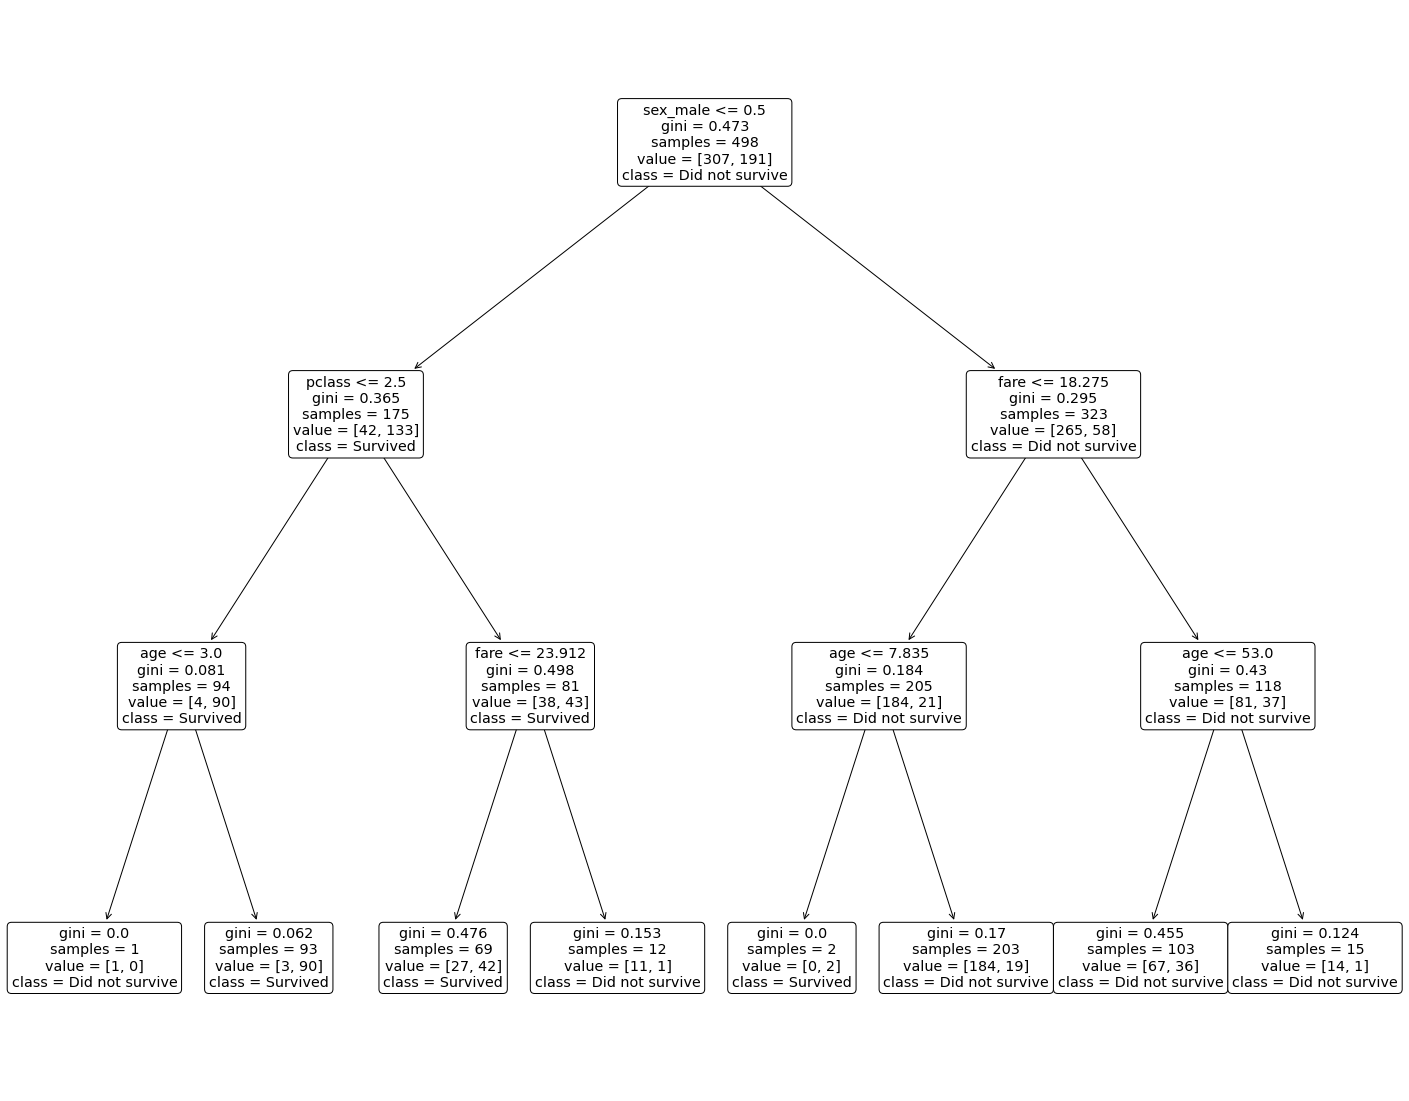

In [23]:
plt.figure(figsize=(25, 20))
plot_tree(clf, feature_names=X_train.columns, class_names=['Did not survive', 'Survived'], rounded=True)

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

#### Prediction

In [32]:
y_pred = clf.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

#### Probability

In [31]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.90640394, 0.09359606],
       [0.90640394, 0.09359606],
       [0.91666667, 0.08333333]])

#### Accuracy

In [38]:
format(clf.score(X_train, y_train))

'0.8253012048192772'

#### Confusion matrix

In [39]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [40]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

#### Classification report

In [44]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,277,30
1,57,134


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



#### Model for max_depth = 4